<a href="https://colab.research.google.com/github/pachterlab/BI-1C-2024/blob/main/MIS_from_bio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Illustration of the [Afek, Alon Barad et al. 2011](https://www.science.org/doi/10.1126/science.1193210) maximal independent set algorithm inspired by Drosophila sensory organ precursor formation.

Implementation by Lior Pachter

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

# Set the seed for random number generation
seed_value = 50
random.seed(seed_value)

def MIS(graph, D):
    n = len(graph.nodes)
    M = 1
    MIS_set = set()

    for u in graph.nodes:
        graph.nodes[u]['status'] = 'active'
        graph.nodes[u]['v'] = 0

    for i in range(int(math.log(D, 2)) + 1):
        for j in range(M * int(math.log(n, 2)) + 1):
            # Exchange 1
            for u in graph.nodes:
                if graph.nodes[u]['status'] == 'active':
                    if random.random() < 1 / (2 ** (math.log(D, 2) - i)):
                        graph.nodes[u]['v'] = 1
                        for v in graph.neighbors(u):
                            graph.nodes[v]['v'] = 0

            # Exchange 2
            for u in graph.nodes:
                if graph.nodes[u]['v'] == 1:
                    MIS_set.add(u)
                    graph.nodes[u]['status'] = 'inactive'
                    for v in graph.neighbors(u):
                        graph.nodes[v]['status'] = 'inactive'

    return MIS_set

# Example usage
G = nx.erdos_renyi_graph(15, 0.3)
D = max([G.degree(u) for u in G.nodes])
MIS_set = MIS(G, D)
print("Maximal Independent Set:", MIS_set)


Maximal Independent Set: {1, 3, 4, 7, 9, 10}


Original Graph


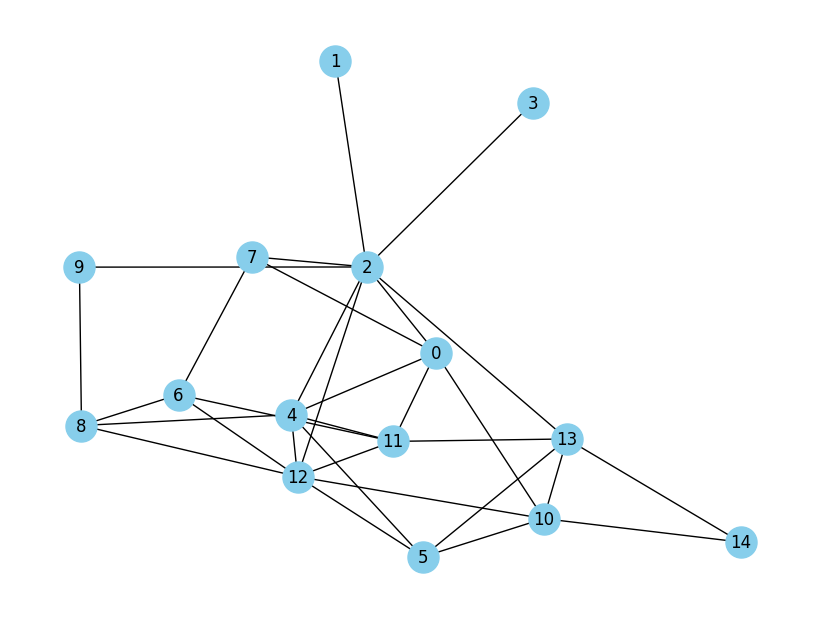

Graph with Maximal Independent Set


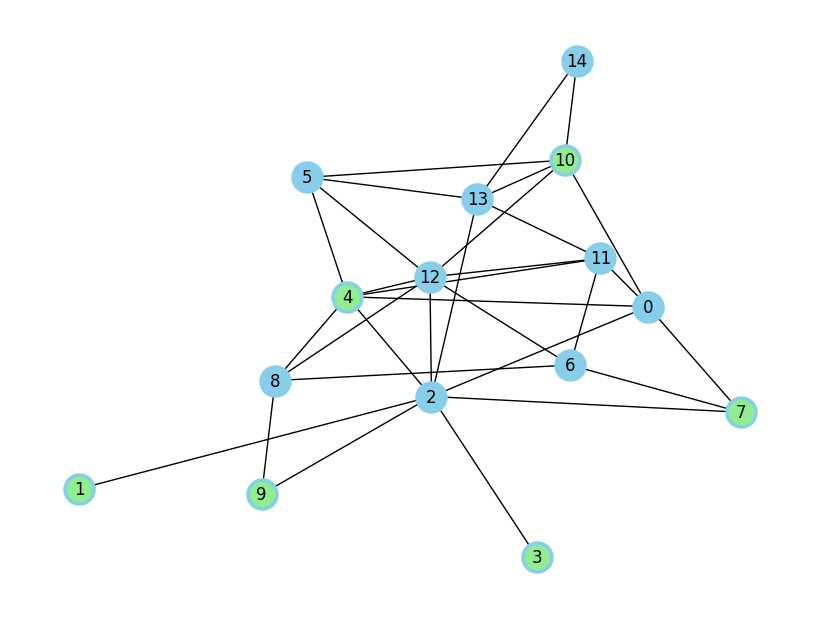

In [11]:
def display_graph(graph, MIS_set=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black')

    if MIS_set:
        nx.draw_networkx_nodes(graph, pos, nodelist=MIS_set, node_color='lightgreen')

    plt.show()

# Display the graph
print("Original Graph")
display_graph(G)

# Display the graph with the MIS
print("Graph with Maximal Independent Set")
display_graph(G, MIS_set)


In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

# Set the seed for random number generator
seed_value = 42
random.seed(seed_value)

def MIS(graph, D):
    n = len(graph.nodes)
    M = 1
    MIS_set = set()

    for u in graph.nodes:
        graph.nodes[u]['status'] = 'active'
        graph.nodes[u]['v'] = 0

    for i in range(int(math.log(D, 2)) + 1):
        for j in range(M * int(math.log(n, 2)) + 1):
            # Exchange 1
            for u in graph.nodes:
                if graph.nodes[u]['status'] == 'active':
                    if random.random() < 1 / (2 ** (math.log(D, 2) - i)):
                        graph.nodes[u]['v'] = 1
                        for v in graph.neighbors(u):
                            graph.nodes[v]['v'] = 0

            # Exchange 2
            for u in graph.nodes:
                if graph.nodes[u]['v'] == 1:
                    MIS_set.add(u)
                    graph.nodes[u]['status'] = 'inactive'
                    for v in graph.neighbors(u):
                        graph.nodes[v]['status'] = 'inactive'

    return MIS_set

# Example usage
G = nx.erdos_renyi_graph(15, 0.3)
D = max([G.degree(u) for u in G.nodes])
MIS_set = MIS(G, D)
print("Maximal Independent Set:", MIS_set)


Maximal Independent Set: {2, 5, 6, 10, 11, 14}
